In [1]:
from inputs import customers, depots, vehicle_weight
from models import SMAVRP, GeneticAgent, RSAgent, TabouAgent, Client
import random as rd
from tqdm.notebook import trange
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

customers = [Client(i, *row) for i, row in enumerate(rd.sample(customers, 50))]

result_df = pd.DataFrame()

c:\Users\jules\AppData\Local\Programs\Python\Python311\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\jules\AppData\Local\Temp\ipykernel_47764\814257277.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


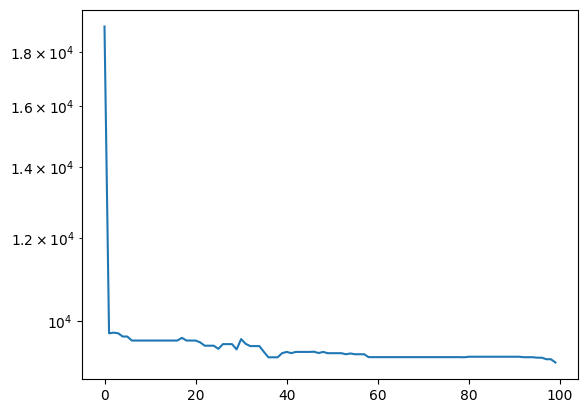

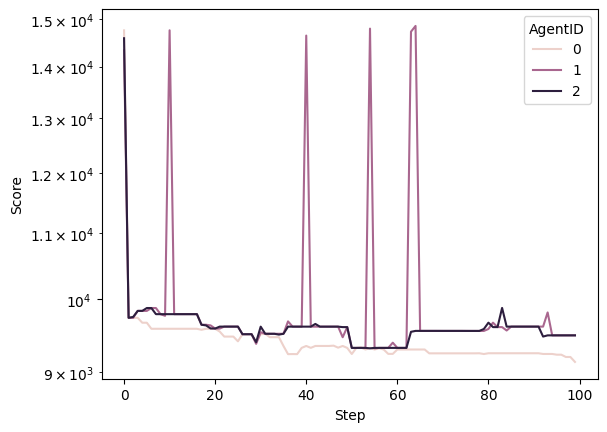

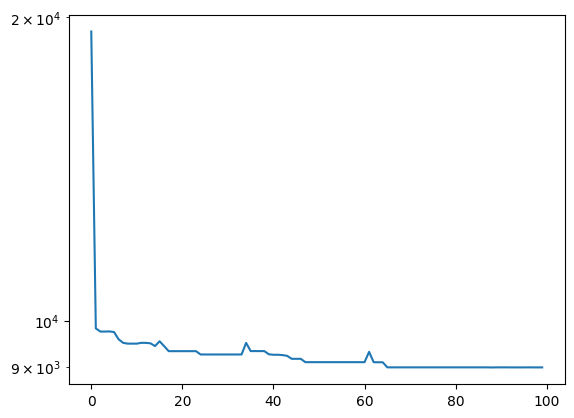

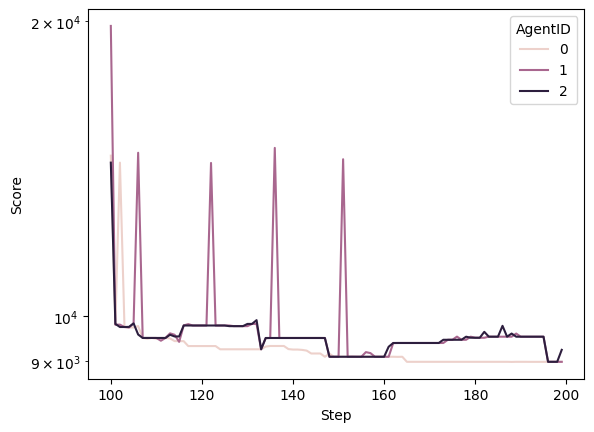

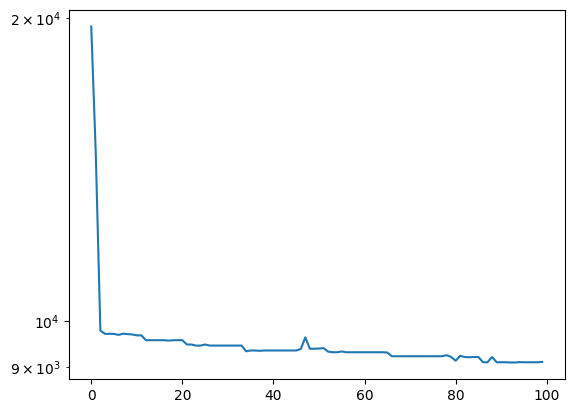

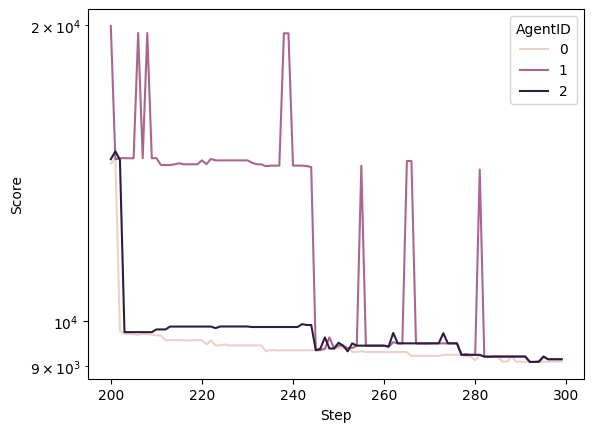

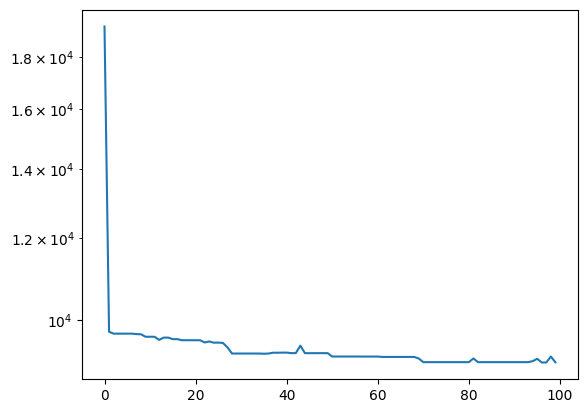

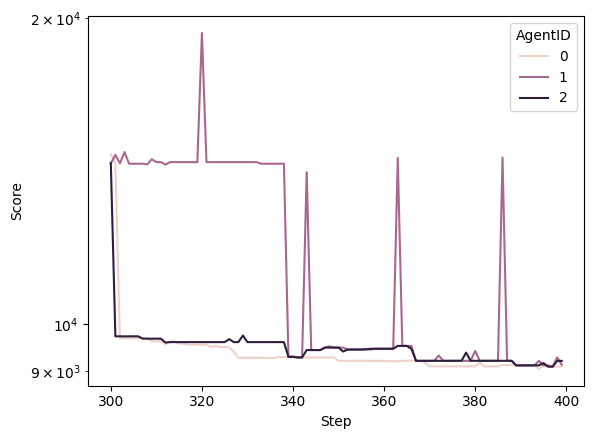

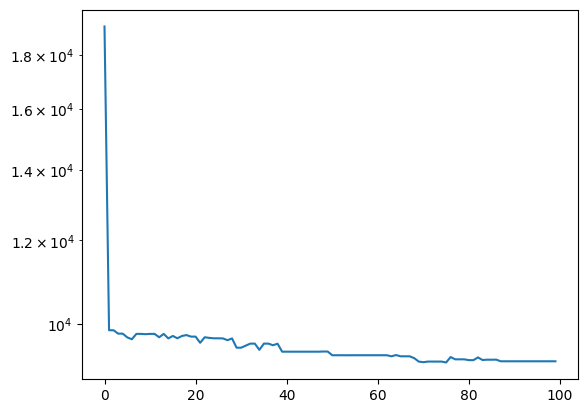

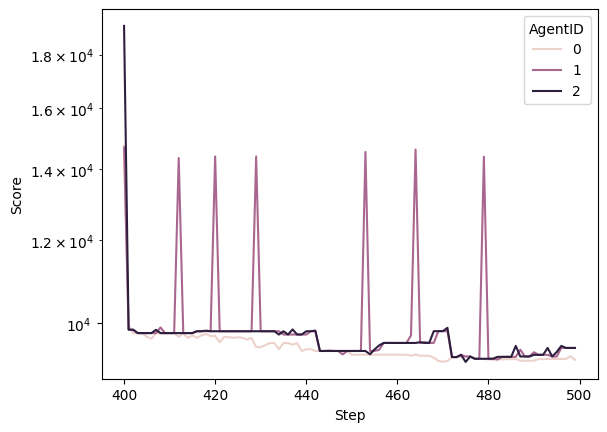

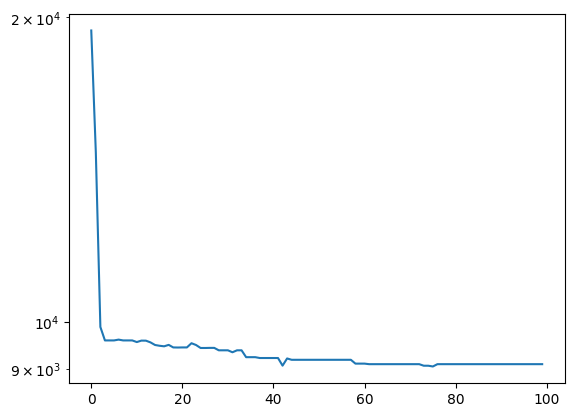

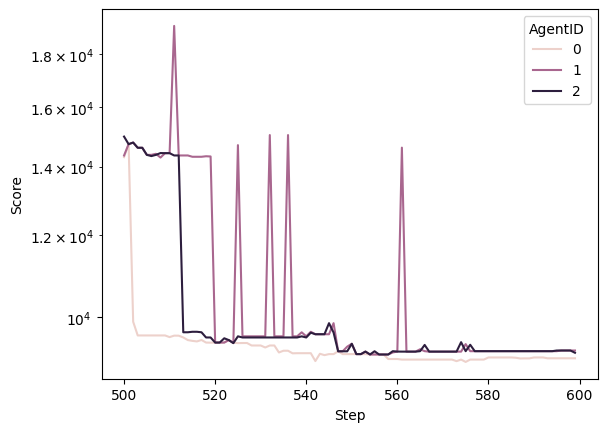

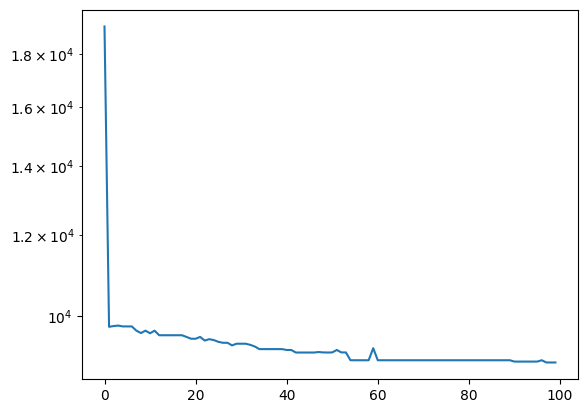

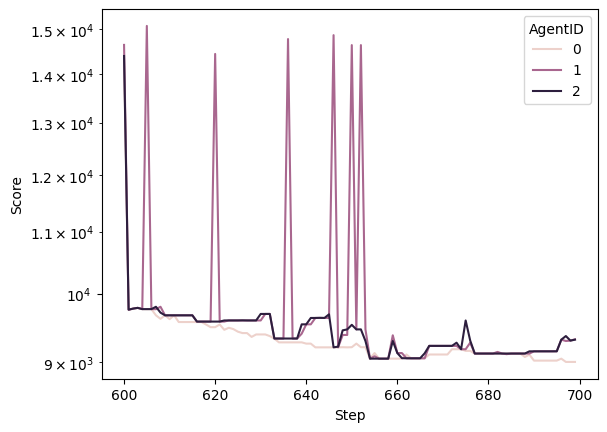

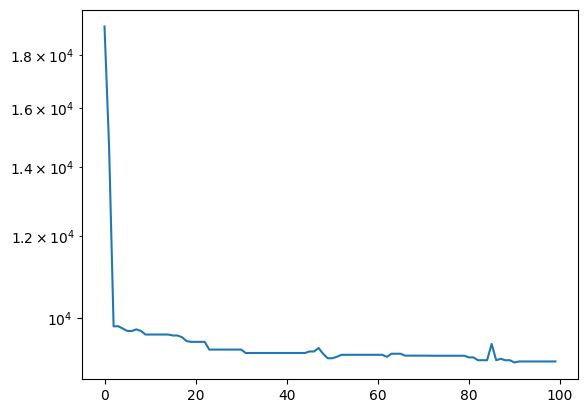

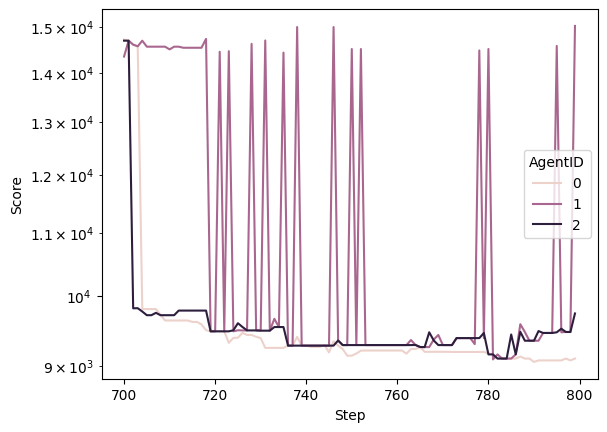

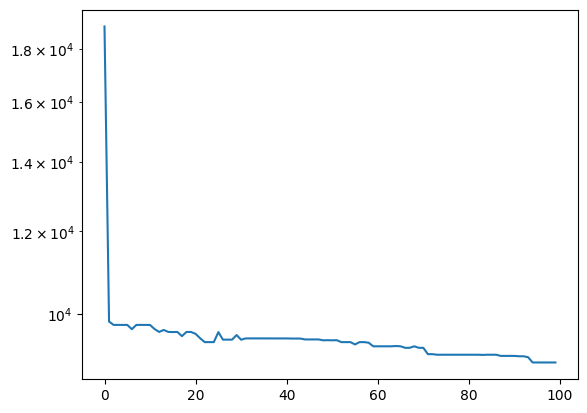

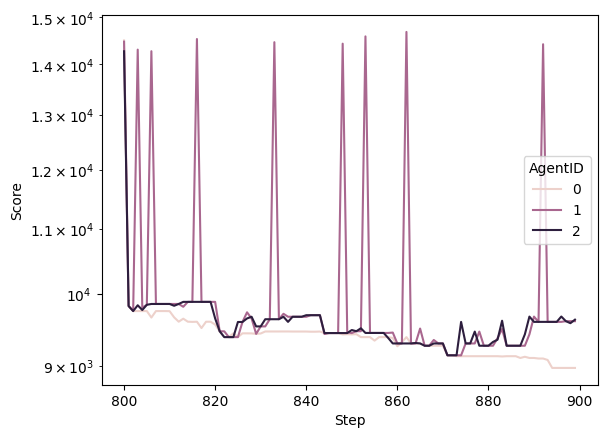

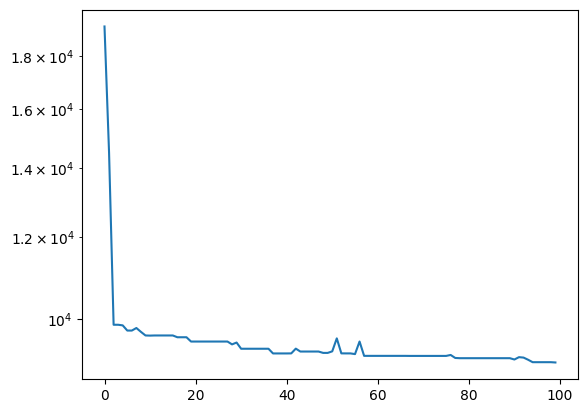

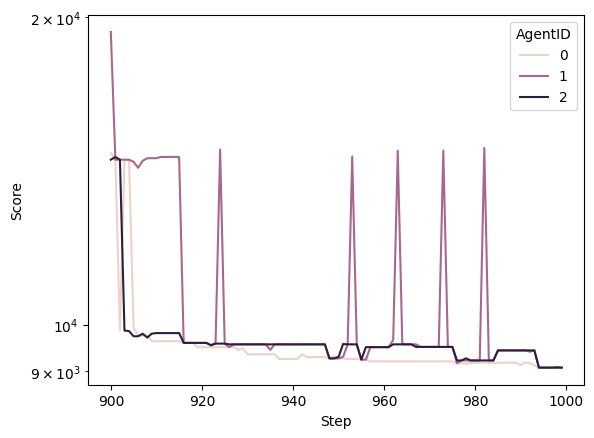

<Figure size 640x480 with 0 Axes>

In [2]:


cout_vehicule = rd.uniform(0, 100)

gen_pop_size = rd.randint(4, 15)
Pcross = rd.uniform(0,1)
Pmut = rd.uniform(0,1)

rs_pop_size = rd.randint(4, 15)
t0 = rd.uniform(0,100)
cooling = rd.uniform(0, 0.001)
nb_iter = rd.randint(5,10)

tabou_pop_size = rd.randint(4, 15)
tabou_size = 3*len(customers)*(len(customers) -1)/4
tabou_neighbors = rd.randint(5,10)



sma = SMAVRP(customers, depots[0], vehicle_weight, cout_vehicule, Pmut)

sma.add_agent(GeneticAgent(0,sma, 100, 0.8))
sma.add_agent(RSAgent(1, sma, rs_pop_size, t0, cooling))
sma.add_agent(TabouAgent(2, sma, tabou_pop_size, tabou_size, tabou_neighbors))

for k in trange (10):
    for i in trange(100, leave = False):
        sma.step()

    sma.datacollector.get_model_vars_dataframe().best_solution.plot(kind="line")
    plt.yscale('log')

    plt.figure()
    sns.lineplot(data =sma.datacollector.get_agent_vars_dataframe(), x = "Step", y = "Score", hue = "AgentID")
    plt.yscale('log')
    plt.figure()

    result_df = pd.concat([result_df, pd.DataFrame({
        'gen_pop_size' : [gen_pop_size],
        'Pcross' : [Pcross],
        'Pmut' : [Pmut],
        'rs_pop_size' : [rs_pop_size],
        't0' : [t0],
        'cooling' : [cooling],
        'tabou_pop_size' : [tabou_pop_size],
        'tabou_size' : [tabou_size],
        'tabou_neighbors' : [tabou_neighbors],
        'Qlearning_iteration':[k],
        'best_solution_reached_at' : [sma.datacollector.get_model_vars_dataframe().best_solution.argmin()],
        'best_solution' : [sma.datacollector.get_model_vars_dataframe().best_solution.min()]
        })], ignore_index=True).reset_index(drop=True)
    sma.reset()


<Axes: xlabel='Qlearning_iteration', ylabel='best_solution'>

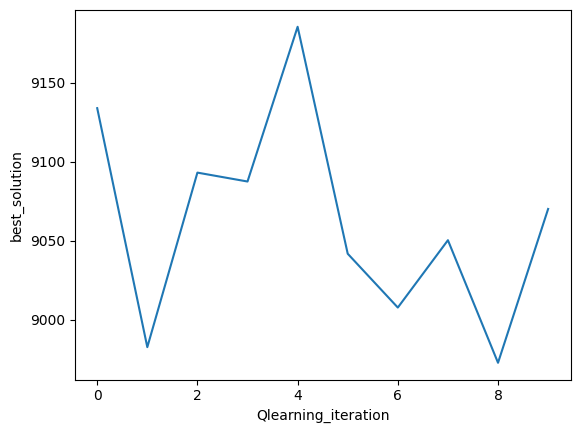

In [3]:
sns.lineplot(data = result_df, x = 'Qlearning_iteration', y = 'best_solution')


<Axes: xlabel='Qlearning_iteration', ylabel='best_solution_reached_at'>

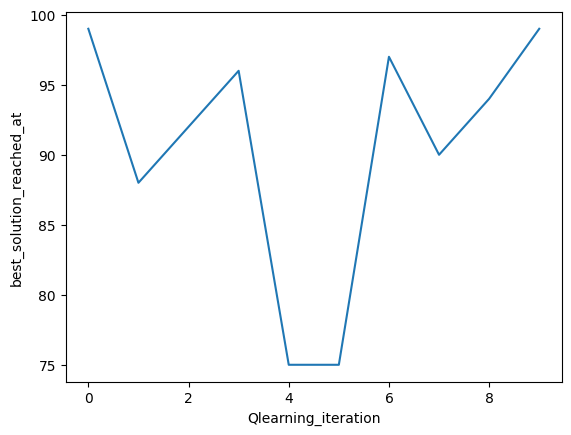

In [5]:
sns.lineplot(data = result_df, x = 'Qlearning_iteration', y = 'best_solution_reached_at')


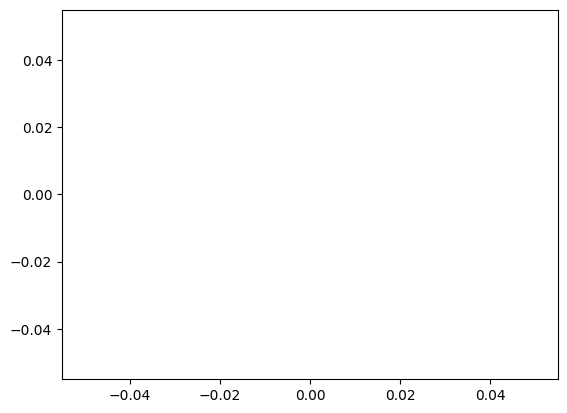

In [4]:
plt.plot(list(map(lambda s: s.score(),sma.good_solution_pool)))

In [5]:
sma.datacollector.get_model_vars_dataframe()

,best_solution
0,16379.914782
1,6873.077767
2,7134.584223
3,7046.410439
4,6798.291741
...,...
2995,6740.597561
2996,6707.287731
2997,6678.927876
2998,6830.999784
